<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Привет! Меня зовут Сысоева Вера.
    
Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.
    
Я буду поддерживать версионность комментариев, и при следующих итерациях комментарии будут выделены, как "Комментраии ревьюера - 2 (3 и.т.д.)"
    
Если у тебя есть замечания, возражения и вопросы, ты можешь писать свои комментарии, по возможности выделяй их так же цветом (например, синим), чтоб их можно было легко отделить от текста проекта. 
    
Кстати, предлагаю сразу общаться на "ты".
    
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.
    
</div>

# Постановка задачи

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


# Изучение данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

MonthDict = { 1 : 'January',
       2 : 'February',
       3 : 'March',
       4 : 'April',
       5 : 'May',
       6 : 'June',
       7 : 'July',
       8 : 'August',
       9 : 'September',
       10 : 'October',
       11 : 'November',
       12 : 'December'
      }



<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Ок, использование словаря - это очень полезный подход. Но конкретно для месяцев замена на названия не очень удобна, числа более подходят, например, для сортировки и чаще делают наоборот слова заменяют на числа
    
</div>

Рассмотрим, какие данные нам предоставлены:

In [2]:
calls = pd.read_csv('/datasets/calls.csv') #данные о звонках
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [4]:
internet = pd.read_csv('/datasets/internet.csv')#данные об интернет-сессиях
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [5]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [6]:
messages = pd.read_csv('/datasets/messages.csv')#данные о сообщениях
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [7]:
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [8]:
tariffs = pd.read_csv('/datasets/tariffs.csv')#данные о тарифах
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [9]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
users = pd.read_csv('/datasets/users.csv')#данные о пользователях
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


# Подготовка данных

Проверим данные на наличие дубликатов:

In [12]:
calls.duplicated().sum()

0

In [13]:
internet.duplicated().sum()

0

In [14]:
messages.duplicated().sum()

0

In [15]:
tariffs.duplicated().sum()

0

In [16]:
users.duplicated().sum()

0

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Молодец, что не забываешь про дубли
    
</div>

Дубликатов в данных не обнаружено. Пропусков тоже нет, за исключением пустых значений в столбце <strong> churn_date </strong>. Если значение пропущено, то тариф еще действовал на момент выгрузки данных, природа этих пропусков понятна, оставим их без изменений.
Как видим, во всех таблицах даты представлены в виде строк. Так как нам необходимо оперировать этими данными, следует привести их к общему формату:

In [17]:
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [18]:
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [19]:
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [20]:
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'],format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Хорошо, даты верно заменились
    
</div>

Известно, что сотовый оператор округляет секунды разговоров до минут, при этом каждый звонок округляется отдельно. Следуя этим требованиям, округлим данные таблицы <strong>calls</strong> в столбце <strong>duration</strong> до целых минут. Создадим для этого специальную функцию:

In [21]:
def int_r(num):
    num = int(num + (1 if ((num-int(num))> 0) else 0))
    return num

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Ок, но для этого есть готовая функция ceils
    
</div>

In [22]:
calls['duration'] = calls['duration'].apply(lambda x: int_r(x))
calls.info()
#calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


Добавим столбец с указанием бесплатного лимита в гигабайтах в таблицу о тарифах:

In [23]:
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included']/1024

Перейдем к формированию сводных таблиц. Для начала добавим столбец <strong> month </strong> в таблицу звонков, таблицу сообщений и таблицу с трафиком:

In [24]:
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month # добавляем новый столбец
internet['month'] = internet['session_date'].dt.month

Для удобства будем использовать таблицу о пользователях с индексацией по <strong>user_id</strong>:

In [25]:
data_users = users.set_index('user_id')

<ul>
<li> <strong>Количество сделанных звонков и израсходованных минут разговора по месяцам:</strong> </li>

Выводим таблицу с указанием количества сделанных звонков по месяцам для каждого пользователя:

In [26]:
pivot_num_of_calls = calls.pivot_table(index=['user_id','month'],values='duration',aggfunc='count')
data_num_of_calls = pivot_num_of_calls.unstack()
data_num_of_calls = data_num_of_calls.fillna(0)
data_num_of_calls = data_num_of_calls.astype(int)
data_num_of_calls.columns = MonthDict.values()
data_num_of_calls.head(10)

,January,February,March,April,May,June,July,August,September,October,November,December
user_id,,,,,,,,,,,,
1000,0,0,0,0,22,43,47,52,58,57,43,46
1001,0,0,0,0,0,0,0,0,0,0,59,63
1002,0,0,0,0,0,15,26,42,36,33,32,33
1003,0,0,0,0,0,0,0,55,134,108,115,108
1004,0,0,0,0,9,31,22,19,26,29,19,21
1005,15,69,77,101,73,80,77,71,66,100,75,84
1006,0,3,46,47,56,53,49,42,54,44,62,50
1007,0,0,0,25,67,68,69,74,87,69,81,72
1008,0,0,0,0,0,0,0,0,0,0,0,52


<div style="border:solid gold 2px; padding: 20px"> 
    
**Комментарий ревьюера**

В данном случае ОК, но вообще это не очень удобный подход. Предчтавь, что у нас будут в следующий раз данные за 5 лет.
    
Все же удобнее делать линейную таблицу с двумя ключами пользователь и месяц
    
</div>

Выводим таблицу с указанием продолжительности сделанных звонков (в минутах) по месяцам для каждого пользователя:

In [27]:
pivot_duration_of_calls = calls.pivot_table(index=['user_id','month'],values='duration',aggfunc='sum')
data_duration_of_calls = pivot_duration_of_calls.unstack()
data_duration_of_calls = data_duration_of_calls.fillna(0)
data_duration_of_calls = data_duration_of_calls.astype(int)
data_duration_of_calls.columns = MonthDict.values()
data_duration_of_calls.head(10)

,January,February,March,April,May,June,July,August,September,October,November,December
user_id,,,,,,,,,,,,
1000,0,0,0,0,159,172,340,408,466,350,338,333
1001,0,0,0,0,0,0,0,0,0,0,430,414
1002,0,0,0,0,0,117,214,289,206,212,243,236
1003,0,0,0,0,0,0,0,380,961,855,824,802
1004,0,0,0,0,35,171,135,137,117,145,117,130
1005,95,456,606,712,595,612,569,619,479,723,547,592
1006,0,42,286,356,370,478,316,275,360,267,372,379
1007,0,0,0,198,480,545,577,458,655,465,580,421
1008,0,0,0,0,0,0,0,0,0,0,0,339


<ul><li> <strong>Количество отправленных сообщений по месяцам:</strong> </li>

Выводим таблицу с указанием количества сообщений по месяцам для каждого пользователя:

In [28]:
pivot_num_of_messages = messages.pivot_table(index=['user_id','month'],values='id',aggfunc='count')
data_num_of_messages = pivot_num_of_messages.unstack()
data_num_of_messages = data_num_of_messages.fillna(0)
data_num_of_messages = data_num_of_messages.astype(int)
data_num_of_messages.columns = MonthDict.values()
data_num_of_messages.head(10)

,January,February,March,April,May,June,July,August,September,October,November,December
user_id,,,,,,,,,,,,
1000,0,0,0,0,22,60,75,81,57,73,58,70
1002,0,0,0,0,0,4,11,13,4,10,16,12
1003,0,0,0,0,0,0,0,37,91,83,94,75
1004,0,0,0,0,95,134,181,151,146,165,158,162
1005,7,38,56,41,42,47,56,64,52,44,51,54
1007,0,0,0,11,39,26,26,27,31,18,21,26
1008,0,0,0,0,0,0,0,0,0,0,0,56
1009,0,0,2,14,7,14,14,9,12,15,11,12
1011,0,0,4,7,13,13,13,15,10,17,12,6


<ul><li> <strong> Объем израсходованного интернет-трафика по месяцам:</strong> </li>

Выводим таблицу с указанием интернет-трафика(в гигабайтах) по месяцам для каждого пользователя. В соответствии с правилами оператора, произведем округление трафика за месяц в большую сторону в гигабайтах, используя созданную ранее специальную функцию:

In [29]:
pivot_internet = internet.pivot_table(index=['user_id','month'],values='mb_used',aggfunc='sum')
pivot_internet['gb_used'] = pivot_internet['mb_used']/1024
pivot_internet['gb_used'] = pivot_internet['gb_used'].apply(lambda x: int_r(x))
del pivot_internet['mb_used']
data_months_traffic = pivot_internet.unstack()
data_months_traffic = data_months_traffic.fillna(0)
data_months_traffic = data_months_traffic.astype(int)
data_months_traffic.columns = MonthDict.values()
data_months_traffic.head(10)

,January,February,March,April,May,June,July,August,September,October,November,December
user_id,,,,,,,,,,,,
1000,0,0,0,0,3,23,14,14,15,15,15,10
1001,0,0,0,0,0,0,0,0,0,0,18,14
1002,0,0,0,0,0,11,18,20,17,14,19,18
1003,0,0,0,0,0,0,0,9,13,15,12,10
1004,0,0,0,0,14,18,22,28,15,19,16,18
1005,3,8,11,10,8,10,8,8,7,8,13,9
1006,0,2,17,14,13,13,20,19,16,20,13,19
1007,0,0,0,8,18,14,16,21,13,15,16,13
1008,0,0,0,0,0,0,0,0,0,0,0,13


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Хорошо, агрегации получены верно, молодец
    
</div>

Для дальнейшего анализа удобно разбить все полученные данные по типу тарифа. Для начала создадим две отдельные таблицы пользователей для каждого тарифа: 

In [30]:
data_users_ultra = data_users.query('tariff == "ultra"')
del data_users_ultra['tariff']
data_users_ultra.head()

,age,churn_date,city,first_name,last_name,reg_date
user_id,,,,,,
1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25
1003,23,NaT,Москва,Белла,Белякова,2018-08-17
1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14
1013,36,NaT,Иваново,Борис,Андреенко,2018-11-14
1016,58,NaT,Омск,Марица,Сазонова,2018-11-21


In [31]:
data_users_smart = data_users.query('tariff == "smart"')
del data_users_smart['tariff']
data_users_smart.head()

,age,churn_date,city,first_name,last_name,reg_date
user_id,,,,,,
1001,41,NaT,Москва,Иван,Ежов,2018-11-01
1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17
1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25
1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26
1007,65,NaT,Москва,Юна,Березина,2018-04-19


Создадим функцию для определения названия тарифа по имени пользователя:

In [32]:
def tariff_index(user): # функция для определения названия тарифа
    tariff = data_users.at[user,'tariff']
    return tariff

Добавим столбец с названиями тарифа в наши сводные таблицы. Для того, чтобы не менять удобную индексацию наших таблиц по user_id, создадим временные столбцы с указанием уникального номера пользователя,потом их удалим:

In [33]:
data_num_of_calls['user_id'] = data_num_of_calls.index
data_duration_of_calls['user_id'] = data_duration_of_calls.index
data_num_of_messages['user_id'] = data_num_of_messages.index
data_months_traffic['user_id'] = data_months_traffic.index
data_num_of_calls['tariff'] = data_num_of_calls['user_id'].apply(tariff_index)
data_duration_of_calls['tariff'] = data_duration_of_calls['user_id'].apply(tariff_index)
data_num_of_messages['tariff'] = data_num_of_messages['user_id'].apply(tariff_index)
data_months_traffic['tariff'] = data_months_traffic['user_id'].apply(tariff_index)
del data_num_of_calls['user_id']
del data_duration_of_calls['user_id']
del data_num_of_messages['user_id']
del data_months_traffic['user_id']

Теперь можно разделить наши данные по тарифам:

In [34]:
data_num_of_calls_ultra = data_num_of_calls.query('tariff == "ultra"')
data_num_of_calls_smart = data_num_of_calls.query('tariff == "smart"')
del data_num_of_calls_ultra['tariff']
del data_num_of_calls_smart['tariff']

data_duration_of_calls_ultra = data_duration_of_calls.query('tariff == "ultra"')
data_duration_of_calls_smart = data_duration_of_calls.query('tariff == "smart"')
del data_duration_of_calls_ultra['tariff']
del data_duration_of_calls_smart['tariff']

data_num_of_messages_ultra = data_num_of_messages.query('tariff == "ultra"')
data_num_of_messages_smart = data_num_of_messages.query('tariff == "smart"')
del data_num_of_messages_ultra['tariff']
del data_num_of_messages_smart['tariff']

data_months_traffic_ultra = data_months_traffic.query('tariff == "ultra"')
data_months_traffic_smart = data_months_traffic.query('tariff == "smart"')
del data_months_traffic_ultra['tariff']
del data_months_traffic_smart['tariff']


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Я бы все же не делила на таком раннем этапе. При необходимости сделать query можно всегда, а слить таблицы обычно сложнее
    
</div>

<ul>
<li> <strong> Выручка с каждого пользователя по месяцам:</strong> </li> 

Для каждого сервиса создадим функцию подсчета платы сверх тарифного плана: 

In [35]:
def calls_overpay(duration,tariff):# для звонков
    
    if tariff == 'smart':
        i = 0
    else:
        i = 1
        
    subscription_calls = tariffs.at[i,'minutes_included']
    over_subscription_calls = tariffs.at[i,'rub_per_minute']
    if duration > subscription_calls:
        overpay = (duration - subscription_calls)*over_subscription_calls
    else:
        overpay = 0
        
    return (overpay)   



def messages_overpay(num,tariff):# для сообщений
    
    if tariff == 'smart':
        i = 0
    else:
        i = 1
        
    subscription_messages = tariffs.at[i,'messages_included']
    over_subscription_messages = tariffs.at[i,'rub_per_message']
    if num > subscription_messages:
         overpay = (num - subscription_messages)*over_subscription_messages
    else:
         overpay = 0
        
    return (overpay) 


def internet_overpay(traffic,tariff):# для интернета
    
    if tariff == 'smart':
        i = 0
    else:
        i = 1
        
    subscription_internet = tariffs.at[i,'gb_per_month_included']
    over_subscription_internet = tariffs.at[i,'rub_per_gb']
    if traffic > subscription_internet:
        overpay = (traffic - subscription_internet)*over_subscription_internet
    else:
        overpay = 0
        
    return (overpay) 


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Функциональный подход - это здорово, но я бы писала соазу функцию для итоговой выручки. Доп столбцы с выручкой по отдельным параметрам в общем то лишнее
    
</div>

Создадим сводные таблицы по оплате сверх тарифа по каждому сервису тарифа Смарт:

In [36]:
# для тарифа Смарт:
subscription_pay_smart = tariffs.at[0,'rub_monthly_fee']
data_overpay_calls_smart = data_duration_of_calls_smart.applymap(lambda x: calls_overpay(x,'smart'))
data_overpay_messages_smart = data_num_of_messages_smart.applymap(lambda x: messages_overpay(x,'smart'))
data_overpay_internet_smart = data_months_traffic_smart.applymap(lambda x: internet_overpay(x,'smart'))


Наконец, создадим таблицу с общей выручкой(в рублях) по клиентам тарифа Смарт:

In [37]:
data_pay_smart = pd.concat([data_overpay_calls_smart,data_overpay_messages_smart], axis = 1).sum(level=0,axis=1)
data_pay_smart = pd.concat([data_pay_smart,data_overpay_internet_smart], axis = 1).sum(level=0,axis=1)
data_pay_smart = data_pay_smart.applymap(lambda x: x+subscription_pay_smart)
data_pay_smart.head(10)

,January,February,March,April,May,June,July,August,September,October,November,December
user_id,,,,,,,,,,,,
1001,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,1150.0,550.0
1002,550.0,550.0,550.0,550.0,550.0,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0
1005,550.0,550.0,886.0,1186.0,835.0,886.0,775.0,949.0,556.0,1219.0,694.0,838.0
1006,550.0,550.0,950.0,550.0,550.0,550.0,1550.0,1350.0,750.0,1550.0,550.0,1350.0
1007,550.0,550.0,550.0,550.0,1150.0,685.0,981.0,1750.0,1015.0,550.0,990.0,550.0
1008,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,568.0
1009,550.0,550.0,550.0,550.0,550.0,750.0,2550.0,2350.0,1950.0,1550.0,950.0,1350.0
1010,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,750.0,550.0,1350.0,1350.0
1011,550.0,550.0,550.0,1150.0,1150.0,950.0,1356.0,1795.0,1950.0,1540.0,2553.0,2150.0


Аналогично создадим сводные таблицы по оплате сверх тарифа по каждому сервису тарифа Ультра:

In [38]:
# для тарифа Ультра:
subscription_pay_ultra = tariffs.at[1,'rub_monthly_fee']
data_overpay_calls_ultra = data_duration_of_calls_ultra.applymap(lambda x: calls_overpay(x,'ultra'))
data_overpay_messages_ultra = data_num_of_messages_ultra.applymap(lambda x: messages_overpay(x,'ultra'))
data_overpay_internet_ultra = data_months_traffic_ultra.applymap(lambda x: internet_overpay(x,'ultra'))

Создадим таблицу с общей выручкой(в рублях) по клиентам тарифа Ультра:

In [39]:
data_pay_ultra = pd.concat([data_overpay_calls_ultra,data_overpay_messages_ultra], axis = 1).sum(level=0,axis=1)
data_pay_ultra = pd.concat([data_pay_ultra,data_overpay_internet_ultra], axis = 1).sum(level=0,axis=1)
data_pay_ultra = data_pay_ultra.applymap(lambda x: x+subscription_pay_ultra)
data_pay_ultra.head(10)

,January,February,March,April,May,June,July,August,September,October,November,December
user_id,,,,,,,,,,,,
1000,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1003,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1004,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1013,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1016,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1018,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1019,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1021,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1024,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,3900.0,2850.0


Теперь можно вывести общую таблицу выручки (в рублях) по всем пользователям, независимо от тарифа, объединив два предыдущих массива данных:

In [40]:
data_pay_all = pd.concat([data_pay_ultra,data_pay_smart],sort=False,axis=0)
data_pay_all.sort_index(inplace=True)
data_pay_all.head(10)

,January,February,March,April,May,June,July,August,September,October,November,December
user_id,,,,,,,,,,,,
1000,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1001,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,1150.0,550.0
1002,550.0,550.0,550.0,550.0,550.0,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0
1003,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1004,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1005,550.0,550.0,886.0,1186.0,835.0,886.0,775.0,949.0,556.0,1219.0,694.0,838.0
1006,550.0,550.0,950.0,550.0,550.0,550.0,1550.0,1350.0,750.0,1550.0,550.0,1350.0
1007,550.0,550.0,550.0,550.0,1150.0,685.0,981.0,1750.0,1015.0,550.0,990.0,550.0
1008,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,568.0


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Ок, выручка получена верно, молодец
    
</div>

# Анализ данных

Теперь у нас есть все данные для статистического анализа. Будем использовать полученные ранее данные из сводных таблиц по каждому тарифу в качестве выборки. Для удобства преобразуем эти таблицы в одномерные массивы данных для работы с библиотекой numpy. 

<ul>
<li> <strong> Продолжительность звонков за месяц, тариф Ультра:</strong> </li> 

In [41]:
# формируем выборку по всем клиентам тарифа:
np_duration_of_calls_ultra = data_duration_of_calls_ultra.to_numpy()
np_duration_of_calls_ultra = np_duration_of_calls_ultra.flatten() 


In [42]:
# находим среднее значение:
mean_duration_of_calls_ultra = np.mean(np_duration_of_calls_ultra)
mean_duration_of_calls_ultra

302.2867132867133

In [43]:
# находим дисперсию:
var_duration_of_calls_ultra = np.var(np_duration_of_calls_ultra, ddof=1)
var_duration_of_calls_ultra

125730.87634814164

In [44]:
# находим стандартное отклонение:
std_duration_of_calls_ultra = np.std(np_duration_of_calls_ultra, ddof=1)
std_duration_of_calls_ultra

354.5854993483823

Руководствуясь правилом "трех сигм", построим гистограмму распределения, указав правильный отрезок распределения:

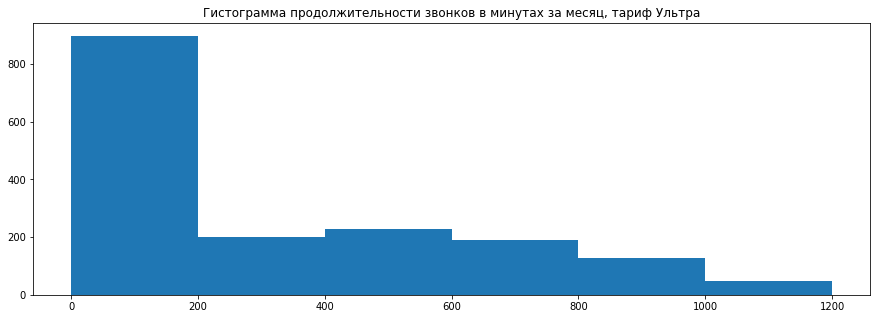

In [45]:
# строим гистограмму:
plt.figure(figsize=(15,5))
plt.hist(np_duration_of_calls_ultra, bins = [0,200,400,600,800,1000,1200])
plt.title("Гистограмма продолжительности звонков в минутах за месяц, тариф Ультра") 
plt.show()

<ul>
<li> <strong> Продолжительность звонков за месяц, тариф Смарт:</strong> </li>

In [46]:
# формируем выборку по всем клиентам тарифа:
np_duration_of_calls_smart = data_duration_of_calls_smart.to_numpy()
np_duration_of_calls_smart = np_duration_of_calls_smart.flatten()

In [47]:
# находим среднее значение:
mean_duration_of_calls_smart = np.mean(np_duration_of_calls_smart)
mean_duration_of_calls_smart

222.43958930276983

In [48]:
# находим дисперсию:
var_duration_of_calls_smart = np.var(np_duration_of_calls_smart, ddof=1)
var_duration_of_calls_smart

62769.43293911956

In [49]:
# находим стандартное отклонение:
std_duration_of_calls_smart = np.std(np_duration_of_calls_smart, ddof=1)
std_duration_of_calls_smart

250.53828637379868

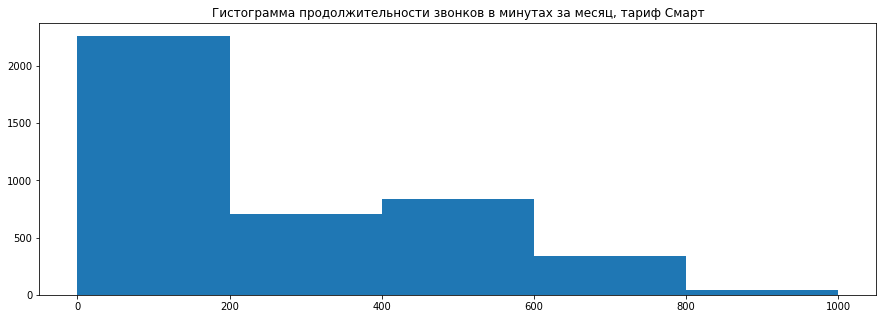

In [50]:
# строим гистограмму:
plt.figure(figsize=(15,5))
plt.hist(np_duration_of_calls_smart, bins = [0,200,400,600,800,1000])
plt.title("Гистограмма продолжительности звонков в минутах за месяц, тариф Смарт") 
plt.show()

Как мы видим, средняя продолжительность звонков за месяц у клиентов тарифа Ультра - около 302 минуты, она выше, чем у клиентов Смарт, где она равна около 222 минутам. Почти все пользователи тарифа Ультра не превышают 1200 минут разговора в месяц. Для тарифа Смарт почти все пользователи не говорят по телефону больше 1000 минут за месяц.
Мы можем сделать вывод, что лимит по минутам разговора в пакете Смарт - это 500 минут в месяц - является недостаточным для пользователей тарифа, так как они довольно часто превышают его. И наоборот, лимит разговоров по тарифу Ультра - 3000 минут - слишком большой, так как подавляющее число пользователей не превышают его. 

<ul>
<li> <strong> Количество сообщений за месяц, тариф Ультра:</strong> </li>

In [51]:
# формируем выборку по всем клиентам тарифа:
np_num_of_messages_ultra = data_num_of_messages_ultra.to_numpy()
np_num_of_messages_ultra = np_num_of_messages_ultra.flatten() 


In [52]:
# находим среднее значение:
mean_num_of_messages_ultra = np.mean(np_num_of_messages_ultra)
mean_num_of_messages_ultra

32.67674731182796

In [53]:
# находим дисперсию:
var_num_of_messages_ultra = np.var(np_num_of_messages_ultra, ddof=1)
var_num_of_messages_ultra

2057.8745900853996

In [54]:
# находим стандартное отклонение:
std_num_of_messages_ultra = np.std(np_num_of_messages_ultra, ddof=1)
std_num_of_messages_ultra

45.36380264137256

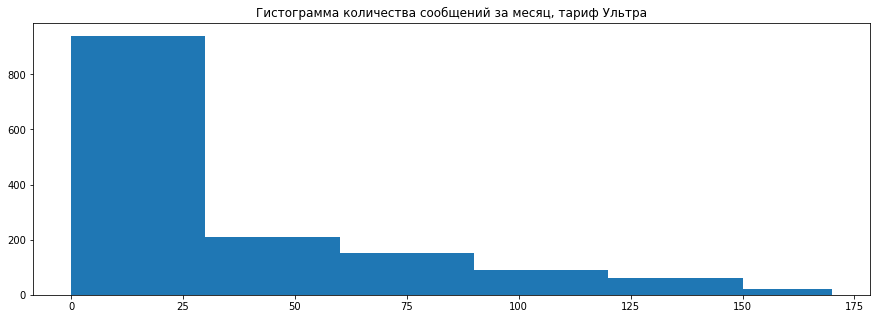

In [55]:
# строим гистограмму:
plt.figure(figsize=(15,5))
plt.hist(np_num_of_messages_ultra, bins = [0,30,60,90,120,150,170])
plt.title("Гистограмма количества сообщений за месяц, тариф Ультра") 
plt.show()

<ul>
<li> <strong> Количество сообщений за месяц, тариф Смарт:</strong> </li>

In [56]:
# формируем выборку по всем клиентам тарифа:
np_num_of_messages_smart = data_num_of_messages_smart.to_numpy()
np_num_of_messages_smart = np_num_of_messages_smart.flatten()

In [57]:
# находим среднее значение:
mean_num_of_messages_smart = np.mean(np_num_of_messages_smart)
mean_num_of_messages_smart

20.533388520971304

In [58]:
# находим дисперсию:
var_num_of_messages_smart = np.var(np_num_of_messages_smart, ddof=1)
var_num_of_messages_smart

753.9480982580632

In [59]:
# находим стандартное отклонение:
std_num_of_messages_smart = np.std(np_num_of_messages_smart, ddof=1)
std_num_of_messages_smart

27.45811534424865

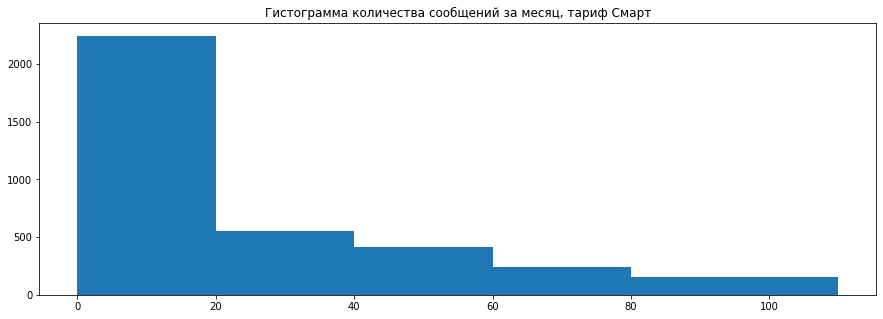

In [60]:
# строим гистограмму:
plt.figure(figsize=(15,5))
plt.hist(np_num_of_messages_smart, bins = [0,20,40,60,80,110])
plt.title("Гистограмма количества сообщений за месяц, тариф Смарт") 
plt.show()

Среднее количество отправляемых сообщений для клиентов тарифа Ультра - около 33. Для клиентов тарифа Смарт - около 21. Клиенты Ультра отправляют в среднем за месяц больше сообщений. Снова стоит заметить, что клиентам Смарт недостаточно лимита в 50 сообщений, довольно много пользователей выходят за этот предел. А клиенты Ультра не превышают 170 сообщений в месяц, что говорит о том,что лимит в 1000 сообщений для этого тарифа слишком большой.  

<ul>
<li> <strong> Объем интернет-трафика за месяц, тариф Ультра:</strong> </li>

In [61]:
# формируем выборку по всем клиентам тарифа:
np_months_traffic_ultra = data_months_traffic_ultra.to_numpy()
np_months_traffic_ultra = np_months_traffic_ultra.flatten() 

In [62]:
# находим среднее значение:
mean_months_traffic_ultra = np.mean(np_months_traffic_ultra)
mean_months_traffic_ultra

10.88548752834467

In [63]:
# находим дисперсию:
var_months_traffic_ultra = np.var(np_months_traffic_ultra, ddof=1)
var_months_traffic_ultra

147.95624984726356

In [64]:
# находим стандартное отклонение:
std_months_traffic_ultra = np.std(np_months_traffic_ultra, ddof=1)
std_months_traffic_ultra

12.163726807490521

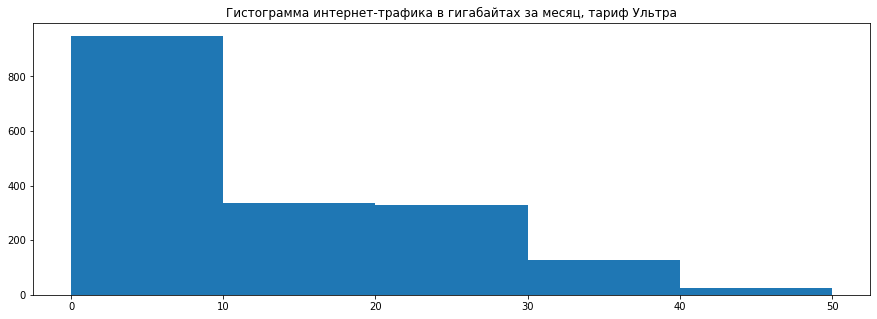

In [65]:
# строим гистограмму:
plt.figure(figsize=(15,5))
plt.hist(np_months_traffic_ultra, bins = [0,10,20,30,40,50])
plt.title("Гистограмма интернет-трафика в гигабайтах за месяц, тариф Ультра") 
plt.show()

<ul>
<li> <strong> Объем интернет-трафика за месяц, тариф Смарт:</strong> </li>

In [66]:
# формируем выборку по всем клиентам тарифа:
np_months_traffic_smart = data_months_traffic_smart.to_numpy()
np_months_traffic_smart = np_months_traffic_smart.flatten() 

In [67]:
# находим среднее значение:
mean_months_traffic_smart = np.mean(np_months_traffic_smart)
mean_months_traffic_smart

8.665952380952382

In [68]:
# находим дисперсию:
var_months_traffic_smart = np.var(np_months_traffic_smart, ddof=1)
var_months_traffic_smart

83.94720914276643

In [69]:
# находим стандартное отклонение:
std_months_traffic_smart = np.std(np_months_traffic_smart, ddof=1)
std_months_traffic_smart

9.162270959907616

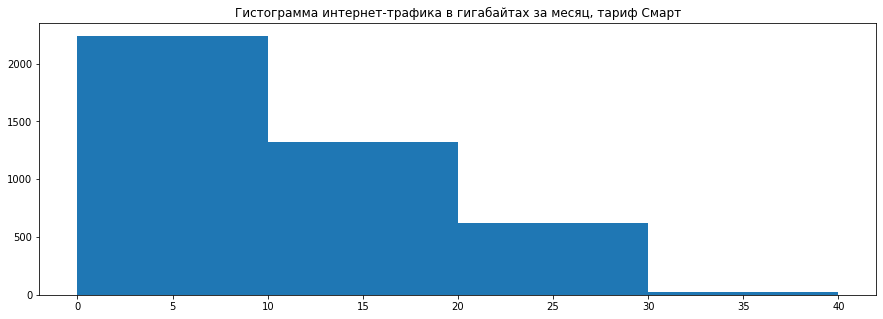

In [70]:
# строим гистограмму:
plt.figure(figsize=(15,5))
plt.hist(np_months_traffic_smart, bins = [0,10,20,30,40])
plt.title("Гистограмма интернет-трафика в гигабайтах за месяц, тариф Смарт") 
plt.show()

Средний расход трафика за месяц у клиентов Ультра - около 11 гигабайт, что немного выше, чем у клиентов Смарт - около 9 гигабайт. Почти все пользователи Ультра не превышают 50 гигабайт трафика в месяц, а пользователи Смарт не превышают 40 гигабайт. Для обоих тарифов лимит трафика без переплаты (15 гигабайт для Смарт, 30 гигабайт для Ультра) оказался мал - существенное количество клиентов превышают его. Эта ситуация больше выражена у клиентов тарифа Смарт - по гистограмме видно, что таких клиентов не меньше 40%.

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Ты верно посчитала все статистики и построила гистограммы, но я бы сделал некоторый сравнительный более наглядный анализ. Лучше статистики свести в общие таблицы для тарифов и построить сравнительные гистограммы для двух тарифов на одном графике. Сейчас сравнивать распределения трудно, т.к. шкала разная. Именно поэтому не совсем удачная идея разделять тарифы на разные наборы.
    
</div>

# Проверка гипотез

<ul>
<li> <strong> Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются</strong> </li>

Для начала сформируем необходимые выборки для работы с библиотекой Numpy:

In [71]:
# формируем выборку по всем клиентам тарифа Смарт:
np_data_pay_smart = data_pay_smart.to_numpy()
np_data_pay_smart = np_data_pay_smart.flatten() 

# формируем выборку по всем клиентам тарифа Ультра:
np_data_pay_ultra = data_pay_ultra.to_numpy()
np_data_pay_ultra = np_data_pay_ultra.flatten()

Примем за нулевую гипотезу утверждение о том, что средние выручки по тарифам Ультра и Смарт равны ( не различаются). Альтернативной гипотезой в этом случае будет утверждение о том, что выручки пользователей тарифов Ультра и Смарт различаются. 
Удобно принимать решение о принятии или отвержении нулевой гипотезы используя критерий p-value. Это критерий статистической значимости разницы между средними значениями наших выборок, при этом критический уровень значимости мы зададим вручную. При выборе метода библиотеки stats  принимаем во внимание, что наши выборки по клиентам разных тарифов являются статистически независимыми.

In [72]:
alpha = 0.05 # критический уровень статистической значимости
results = st.ttest_ind(np_data_pay_smart, np_data_pay_ultra)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.0
Отвергаем нулевую гипотезу


Для наглядности построим гистограммы выручки по тарифам для наших выборок:

In [73]:
# средняя выручка за месяц по тарифу Смарт
np.mean(np_data_pay_smart)

942.7145238095238

In [74]:
# находим стандартное отклонение выручки Смарт:
std_np_data_pay_smart = np.std(np_data_pay_smart, ddof=1)
std_np_data_pay_smart

701.2817698150537

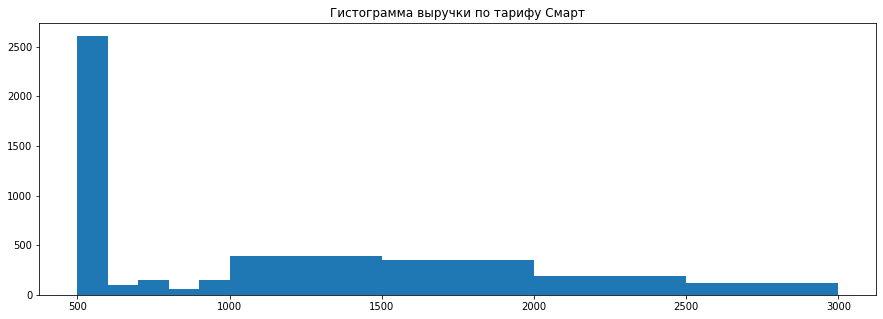

In [75]:
# строим гистограмму выручки Смарт:
plt.figure(figsize=(15,5))
plt.hist(np_data_pay_smart, bins = [500,600,700,800,900,1000,1500,2000,2500,3000])
plt.title("Гистограмма выручки по тарифу Смарт") 
plt.show()

In [76]:
# средняя выручка за месяц по тарифу Ультра
np.mean(np_data_pay_ultra)

2016.6385135135135

In [77]:
# находим стандартное отклонение выручки Ультра:
std_np_data_pay_ultra = np.std(np_data_pay_ultra, ddof=1)
std_np_data_pay_ultra

286.39166712804456

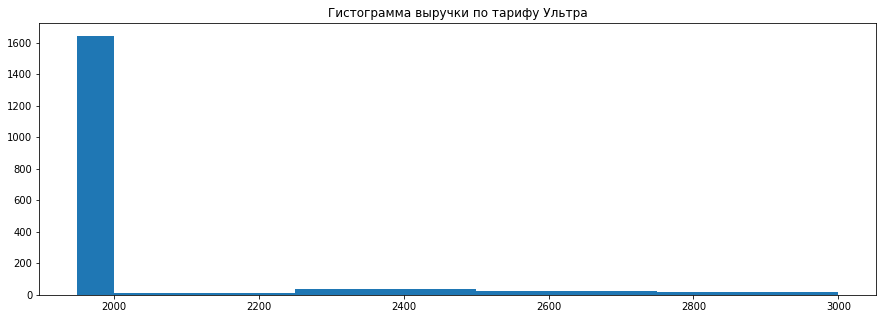

In [78]:
# строим гистограмму выручки Ультра:
plt.figure(figsize=(15,5))
plt.hist(np_data_pay_ultra, bins = [1950,2000,2250,2500,2750,3000])
plt.title("Гистограмма выручки по тарифу Ультра") 
plt.show()

Проверка гипотезы о равенстве средней выручки по тарифам Смарт и Ультра показала, что мы не можем ее принять на основании наших выборок. Таким образом, мы можем отвергнуть нулевую гипотезу и принять альтернативную - о неравенстве средней выручки у пользователей тарифа Смарт и тарифа Ультра.
Если мы обратимся к расчету среднего по нашим выборкам, то мы можем увидеть, что средняя выручка по тарифу Смарт - примерно 950 рублей в месяц, а по тарифу Ультра - около 2000 рублей. Почти всегда пользователи не платят более 3000 рублей в месяц, независимо от тарифа.
Основываясь на проверке гипотезы и анализу по выборкам, можно утверждать, что в генеральной совокупности клиентов оператора Мегалайн средняя выручка по тарифу Ультра скорее всего будет больше, чем средняя выручка по тарифу Смарт. 

<ul>
<li> <strong> Гипотеза: средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов</strong> </li>

Для начала подготовим данные для нашего исследования. У нас уже сформирована общая таблица выручки по всем пользователям для обоих тарифов. Нужно разбить ее на две по признаку места проживания пользователя - в Москве или в другом регионе.

In [79]:
#формируем функцию, возвращающую город проживания по идентификатору пользователя:
def get_city(user): 
    city = data_users.at[user,'city']
    return city

# добавляем к общей таблице выручки новый столбец с указанием города проживания:
data_pay_all['user_id'] = data_pay_all.index
data_pay_all['city'] = data_pay_all['user_id'].apply(get_city)

# формируем две отдельные таблицы по Москве и регионам:
data_pay_all_moscow = data_pay_all.query('city == "Москва"')
data_pay_all_regions = data_pay_all.query('city != "Москва"')
del data_pay_all_moscow['city']
del data_pay_all_moscow['user_id']
del data_pay_all_regions['city']
del data_pay_all_regions['user_id']

Теперь можно сформировать массивы-выборки по выручке для пользователей из Москвы и пользователей из других регионов:  

In [80]:
# формируем выборку по всем клиентам из Москвы
np_data_pay_all_moscow = data_pay_all_moscow.to_numpy()
np_data_pay_all_moscow = np_data_pay_all_moscow.flatten() 

# формируем выборку по всем клиентам из других регионов:
np_data_pay_all_regions = data_pay_all_regions.to_numpy()
np_data_pay_all_regions = np_data_pay_all_regions.flatten()

Примем за нулевую гипотезу утверждение о том, что средние выручки по пользователям из Москвы и других регионов равны ( не различаются). Альтернативной гипотезой в этом случае будет утверждение о том, что эти выручки  различаются. Снова будем использовать p-критерий и учитывать, что выборки в данном случае независимы:

In [81]:
alpha = 0.05 # критический уровень статистической значимости
results = st.ttest_ind(np_data_pay_all_regions, np_data_pay_all_moscow)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5584232295617511
Не получилось отвергнуть нулевую гипотезу


Построим гистограммы для наших выборок:

In [82]:
# средняя выручка, пользователи из Москвы
np.mean(np_data_pay_all_moscow)

1249.993265993266

In [83]:
# находим стандартное отклонение выручки, пользователи из Москвы
np.std(np_data_pay_all_moscow, ddof=1)

757.751320117038

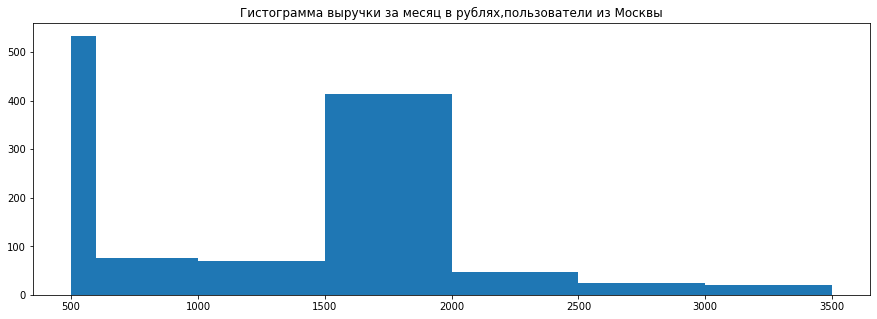

In [84]:
# строим гистограмму выручки, пользователи из Москвы
plt.figure(figsize=(15,5))
plt.hist(np_data_pay_all_moscow, bins = [500,600,1000,1500,2000,2500,3000,3500])
plt.title("Гистограмма выручки за месяц в рублях,пользователи из Москвы") 
plt.show()

In [85]:
# средняя выручка, пользователи из регионов
np.mean(np_data_pay_all_regions)

1264.8201754385964

In [86]:
# находим стандартное отклонение выручки, пользователи из регионов
np.std(np_data_pay_all_regions, ddof=1)

787.465129845767

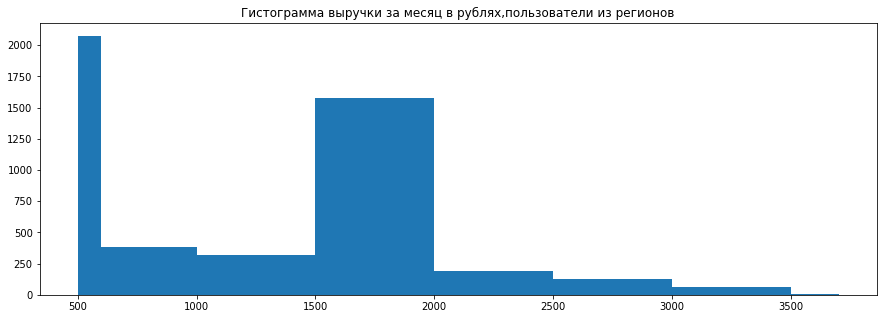

In [87]:
# строим гистограмму выручки, пользователи из регионов
plt.figure(figsize=(15,5))
plt.hist(np_data_pay_all_regions, bins = [500,600,1000,1500,2000,2500,3000,3500,3700])
plt.title("Гистограмма выручки за месяц в рублях,пользователи из регионов") 
plt.show()

Исходя из статистической проверки гипотезы о равенстве средней выручки по Москве и регионам, мы не можем ее опровергнуть. 
Для наших выборок средняя выручка за месяц по Москве - около 1250 рублей, по другим регионам - около 1260 рублей. В Москве за сотовую связь обычно не тратят больше 3500 рублей в месяц, в регионах этот порог даже чуть больше - 3700 рублей.
Судя по всему, можно сделать вывод, что скорее всего в общем случае средняя выручка по пользователям из регионов не отличается от средней выручки по пользователям из Москвы.

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

В целом гипотезы сформулированы и проверены правильно, ты хорошо разобрался в новой теме. В качестве дальнейшего развития можно:
    
    - проверять нормальность распределения,например, тестом Шапиро-Уилка https://www.machinelearningmastery.ru/a-gentle-introduction-to-normality-tests-in-python/. Да, сейчас ты знаешь только один метод проверки, но в дальнейшем их будет больше и они будут разные для нормальных и ненормальных распределений.
    
    - проверять равенство дисперсий и настраивать параметр equal_var
    
</div>

# Выводы

<ul>
<li> <strong> Были получены данные о клиентах и оказанных им услугах от сотового оператора Мегалайн за 2018 год. </strong> </li>
<li> <strong> Данные были изучены на предмет ошибок и приведены к приемлемому для анализа формату. </strong> </li>  
<li> <strong> Произведена подготовка данных для дальнейшего статистического анализа: данные были разбиты на 2 группы по виду тарифа и для каждой группы сформированы сводные таблицы - количество и продолжительность звонков, количество отправленных сообщений и объем израсходованного трафика по месяцам. Сформированы таблицы выручки с каждого пользователя, как для каждого тарифа отдельно, так и в общем случае. </strong> </li>  
<li> <strong> По созданным таблицам были сформированы выборки, исходя из которых анализировалось поведение клиентов. Посчитаны статистические параметры и построены гистограммы для пользователей каждого тарифа. Распределения были описаны и сделаны выводы.   </strong> </li>  
<li> <strong> По результатам статистической проверки гипотеза о  равенстве средней выручки по двум тарифам была опровергнута, следовательно мы не можем опровергнуть гипотезу о их различии. По выборке средняя выручка за месяц по тарифу Ультра больше средней выручки по тарифу Смарт. Все это позволяет полагать, что тариф Ультра в целом более выгоден оператору сотовой связи.      </strong> </li>   
 <li> <strong> По результатам статистической проверки гипотеза о  равенстве средней выручки для пользователей из Москвы и регионов не может быть опровергнута, следовательно мы опровергаем гипотезу о их различии. По выборкам также средние значения выручки за месяц сильно не отличаются. Поэтому мы можем сделать вывод что в общем случае для сотового оператора клиенты из Москвы не приносят больше денег, нежели клиенты из других регионов.Скорее всего по прибыльности эти две группы клиентов развнозначны.       </strong> </li>    

<div style="border:solid green 2px; padding: 20px"> 

**Общий комментарий по проекту**

Ты отлично поработала над проектом, молодец. У тебя получился очень яркий и наглядный статистический анализ. 
    
Ты отлично поняла тему проверки гипотез, это здорово поможет в следующих проектах.

Молодец, что в итоге дала четкие и понятные рекомендации для бизнеса.

Ты отлично справляешься с программой, классно визуализируешь данные. Критических замечаний нет. Удачи.
</div>